In [30]:
import cv2
import imutils
import numpy as np
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt

def label(image, contour):
    colors = [[255,255,0], [255, 255, 255], [102, 178, 255], [0, 153, 0]]
    colorNames = ["yellow", "white", "blue", "green"]
    
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)

    mask = cv2.erode(mask, None, iterations=2)
    mean = cv2.mean(image, mask=mask)[:3]
    
    minDist = (np.inf, None)

    for (i, row) in enumerate(colors):
        d = dist.euclidean(row[0], mean)
        if d < minDist[0]:
            minDist = (d, i)
    return colorNames[minDist[1]]

# crop only
def crop_image(source):
    img = cv2.imread(source, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (600,400))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    gray = cv2.bilateralFilter(gray, 13, 15, 15) 

    edged = cv2.Canny(gray, 30, 200) 
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None

    for c in contours:

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)

        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No contour detected")
        return None, None
    else:
         detected = 1

    if detected == 1:
        cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
        
    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = img[topx:bottomx+1, topy:bottomy+1]

    img = cv2.resize(img,(500,300))
    Cropped = cv2.resize(Cropped,(400,200))
    return img, Cropped

# crop and label the color
def crop_and_label(source):
    img = cv2.imread(source, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (600,400) )
#     img_org = img

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    gray = cv2.bilateralFilter(gray, 13, 15, 15) 

    edged = cv2.Canny(gray, 30, 200) 
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None

    for c in contours:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)

        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No contour detected")
        return img, img, None
    else:
         detected = 1

    if detected == 1:
#         cv2.drawContours(img, [screenCnt], -1, (0, 0, 0), 3)
        col = label(img, screenCnt)

    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = img[topx:bottomx+1, topy:bottomy+1]

    img = cv2.resize(img,(500,300))
    Cropped = cv2.resize(Cropped,(400,200))
    col = corner_color(Cropped)
    
    return img, Cropped, col

def corner_color(Cropped):
    colors = [[255, 255, 0], [200, 200, 200], [102, 178, 255], [0, 153, 0]]
    colorNames = ["yellow", "white", "blue", "green"]
    x = 60
    y = 30
    corner1 = Cropped[0:x, 0:y]
    corner2 = Cropped[200-x:200, 0:y]
    corner3 = Cropped[0:x, 400-y:400]
    corner4 = Cropped[200-x:200, 400-y:400]
    mean1 = cv2.mean(corner1)[:3]
    mean2 = cv2.mean(corner2)[:3]
    mean3 = cv2.mean(corner3)[:3]
    mean4 = cv2.mean(corner4)[:3]
    arr = np.array([mean1, mean2, mean3, mean4])
    mean = arr.mean(axis=0)
    mean = mean2
    print(mean)
    minDist = (np.inf, None)

    for (i, row) in enumerate(colors):
        d = dist.euclidean(row[0], mean)
        if d < minDist[0]:
            minDist = (d, i)
    return colorNames[minDist[1]]

def main(src):
    src = src
    
    # img, cropped = crop_image(src)
    img, cropped, col = crop_and_label(src)
    if col:
        print("Detected", col, "license plate")
    else:
        print("Need closer image")
    plt.imshow(cropped)
#     plt.imshow(img)
#     cv2.imshow('cropped lincence plate', cropped)
#     cv2.imshow('original image', img)

# if __name__ == '__main__':
#     main()

No contour detected
Need closer image


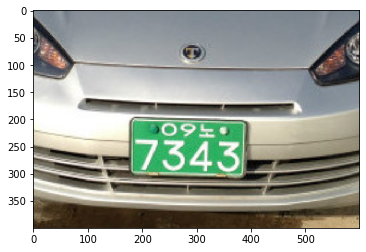

In [31]:
src = './data/green.jpeg'
main(src)

(170.92333333333335, 182.36777777777777, 200.3111111111111)
Detected white license plate


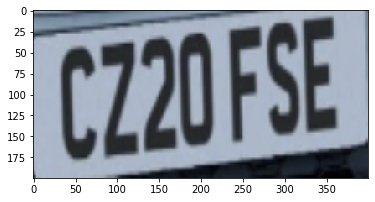

In [32]:
src = './data/example.png'
main(src)

(202.14277777777778, 212.4272222222222, 226.18444444444444)
Detected white license plate


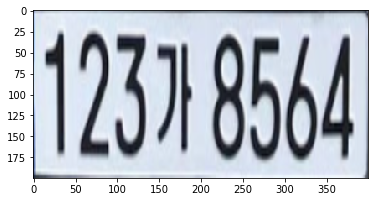

In [33]:
src = './data/white.jpeg'
main(src)

(65.57222222222222, 115.57833333333333, 170.11388888888888)
Detected blue license plate


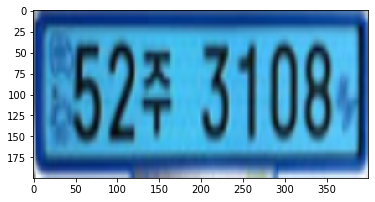

In [34]:
src = './data/example.jpeg'
main(src)